# Source de données

a partir le lien : https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection

# Importer les bibliothèques

In [124]:
import sys

import numpy as np
import torch
from torch.utils.data import Dataset,DataLoader,ConcatDataset
import glob 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import cv2
import torch.nn as nn
import torch.nn.functional as F
import seaborn as sns



# Lecture de images

pour les image n'ont pas de tumeur

In [125]:
tumor=[]
path='./data/yes/*.jpg'
for f in glob.iglob(path):
    img=cv2.imread(f)
    img=cv2.resize(img, (128, 128)) #pour donner une meme dimension a tous les images
    b,g,r=cv2.split(img)
    img=cv2.merge([r,g,b])# pour standariser les couleurs (comme RGB)
    tumor.append(img)

In [126]:
len(tumor)

154

pour les images ont de tumeur

In [127]:
healthy=[]
path='./data/no/*.jpg'
for f in glob.iglob(path):
    img=cv2.imread(f)
    img=cv2.resize(img, (128, 128)) #pour donner une meme dimension a tous les images
    b,g,r=cv2.split(img)
    img=cv2.merge([r,g,b])# pour standariser les couleurs (comme RGB)
    healthy.append(img)

In [128]:
len(healthy)

91

### Probleme: diffrent dimensions et couleurs

visualiser les images afin de verifier le dimensions et le type de couleurs(RGB ou non)

In [129]:
for img in tumor:
    print(img.shape)

(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 

In [130]:
for img in healthy:
    print(img.shape)

(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 

In [131]:
tumor=np.asarray(tumor)
healthy=np.asarray(healthy)

In [132]:
tumor.shape

(154, 128, 128, 3)

In [133]:
healthy.shape

(91, 128, 128, 3)

Combiner les images

In [134]:
all=np.concatenate((healthy,tumor))

In [135]:
all.shape

(245, 128, 128, 3)

# Visualiser quelque images

In [136]:
np.random.choice(5,3,replace=False)

array([2, 0, 1])

In [137]:
def show_random_image(healthy,tumor,num=5):
    healthy_imgs=healthy[np.random.choice(healthy.shape[0],num,replace=False)]
    tumor_imgs=tumor[np.random.choice(tumor.shape[0],num,replace=False)]
    
    plt.figure(figsize=(16, 9))
    for i in range(num):
        plt.subplot(2, num, i + 1) 
        plt.title('Sans tumeur')
        plt.imshow(healthy_imgs[i])
        plt.axis('off')
    for i in range(num):
        plt.subplot(2, num, num + i + 1)  
        plt.title('Avec tumeur')
        plt.imshow(tumor_imgs[i])
        plt.axis('off')


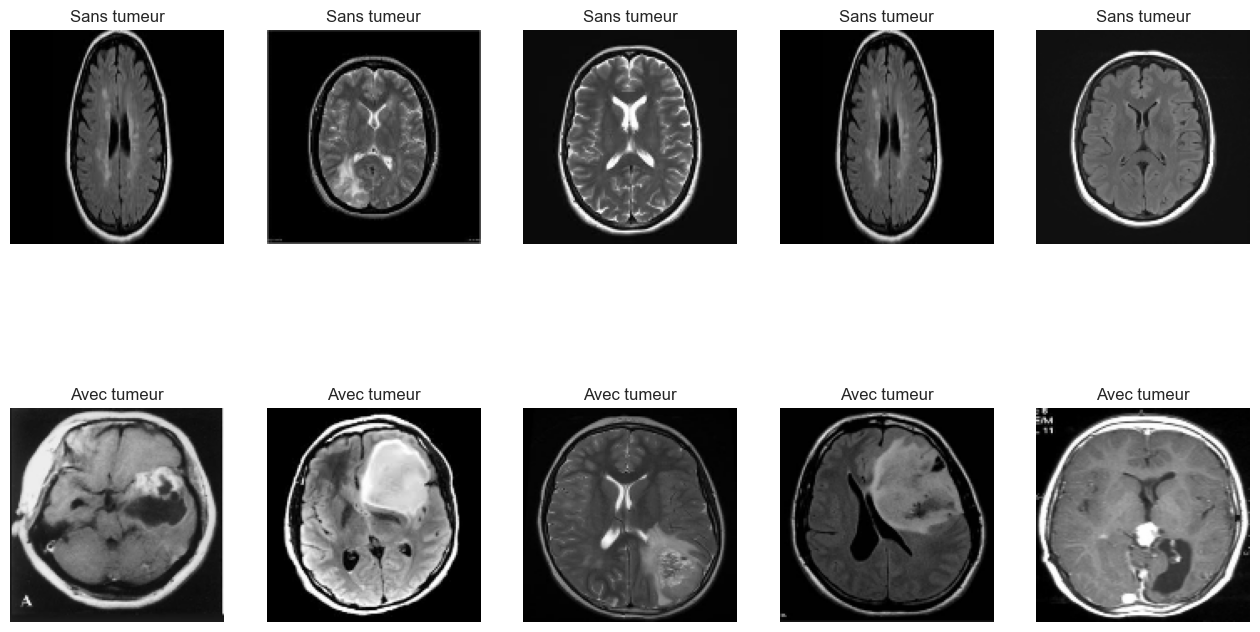

In [138]:
show_random_image(healthy=healthy,tumor=tumor)

# Create Torch Dataset Class

## Creating MRI custom class

In [139]:
class MRI(Dataset):
    def __init__(self):

        tumor = []
        healthy = []
        # cv2 - It reads in BGR format by default
        for f in glob.iglob("./data/yes/*.jpg"):
            img = cv2.imread(f)
            img = cv2.resize(img,(128,128)) # I can add this later in the boot-camp for more adventure
            b, g, r = cv2.split(img)
            img = cv2.merge([r,g,b])
            #img = img.reshape((img.shape[2],img.shape[0],img.shape[1])) # otherwise the shape will be (h,w,#channels)
            tumor.append(img)

        for f in glob.iglob("./data/no/*.jpg"):
            img = cv2.imread(f)
            img = cv2.resize(img,(128,128))
            b, g, r = cv2.split(img)
            img = cv2.merge([r,g,b])
            #img = img.reshape((img.shape[2],img.shape[0],img.shape[1]))
            healthy.append(img)

        # our images
        tumor = np.array(tumor,dtype=np.float32)
        healthy = np.array(healthy,dtype=np.float32)

        # our labels
        tumor_label = np.ones(tumor.shape[0], dtype=np.float32)
        healthy_label = np.zeros(healthy.shape[0], dtype=np.float32)

        # Concatenates
        self.images = np.concatenate((tumor, healthy), axis=0)
        self.labels = np.concatenate((tumor_label, healthy_label))

    def __len__(self):
        return self.images.shape[0]

    def __getitem__(self, index):

        sample = {'image': self.images[index], 'label':self.labels[index]}

        return sample

    def normalize(self):
        self.images = self.images/255.0

### Conversion from BGR to RGB::

effectue les opérations suivantes pour assurer une uniformité dans le format des couleurs :

Séparation des Canaux de Couleur : cv2.split(img) divise l'image en trois canaux de couleur distincts : bleu (B), vert (G) et rouge (R). Cela est nécessaire car OpenCV lit les images en utilisant l'ordre BGR (Bleu, Vert, Rouge) par défaut.

Réorganisation des Canaux : cv2.merge([r, g, b]) combine les canaux séparés dans l'ordre Rouge, Vert, Bleu (RGB). Cette réorganisation est effectuée pour que les images soient dans le format RGB, qui est plus couramment utilisé et attendu dans de nombreux outils et modèles de traitement d'images, en particulier ceux qui sont conçus pour des bibliothèques comme TensorFlow ou PyTorch.

Pourquoi cette étape est-elle importante ?

Uniformité avec les Normes de Traitement : De nombreux modèles et bibliothèques de traitement d'images attendent des images au format RGB plutôt qu'au format BGR. En convertissant l'image au format RGB, vous assurez que les couleurs sont interprétées correctement par les outils et modèles que vous utilisez.

Compatibilité avec les Prétraitements et les Modèles : Certains modèles et prétraitements d'image sont conçus pour fonctionner avec des images en format RGB. En standardisant les couleurs à RGB, vous garantissez que les images sont compatibles avec ces modèles et prétraitements.

En résumé, cette conversion assure que les couleurs de l'image sont dans le format attendu par la plupart des outils et modèles d'apprentissage automatique.

### Normalisation ::
La normalisation est une étape courante de prétraitement dans le traitement d'images et l'apprentissage automatique pour plusieurs raisons :

Standardisation de l'échelle des entrées : Les valeurs des pixels d'image vont généralement de 0 à 255. Normaliser ces valeurs dans une plage comme 0 à 1 aide à standardiser l'échelle des entrées, facilitant ainsi l'apprentissage et la convergence des modèles.

Amélioration de la stabilité de l'entraînement : Les modèles peuvent fonctionner mieux et s'entraîner de manière plus stable lorsque les données d'entrée sont dans une échelle similaire. Des différences importantes dans les plages des entrées peuvent rendre l'entraînement instable ou lent.

Réduction du biais : La normalisation aide à réduire le biais introduit par la magnitude des caractéristiques d'entrée. Par exemple, si les valeurs des pixels ne sont pas normalisées, les caractéristiques avec des plages plus larges peuvent dominer le processus d'apprentissage, affectant les performances du modèle.

Compatibilité avec les fonctions d'activation : De nombreuses fonctions d'activation (par exemple, sigmoid, tanh) fonctionnent mieux lorsque les entrées sont dans une certaine plage. Par exemple, la fonction sigmoid mappe les entrées dans une plage entre 0 et 1, donc normaliser les entrées dans cette plage peut améliorer son efficacité.

Convergence plus rapide : Les données normalisées peuvent aider les modèles à converger plus rapidement pendant l'entraînement, car cela aide à éviter des problèmes comme les gradients qui disparaissent ou explosent.

Dans votre cas, normaliser les valeurs des pixels d'image (self.images=self.images/255.0) permet de s'assurer que les valeurs des pixels sont dans la plage [0, 1], ce qui est généralement une bonne pratique pour les entrées des réseaux de neurones.

In [140]:
mri=MRI()

In [141]:
mri.normalize()

In [142]:
len(mri)

245

In [143]:
img=mri[5]['image']

In [144]:
'max:'+str(np.max(img))+' , min:'+str(np.min(img))

'max:1.0 , min:0.047058824'

# without DataLoader

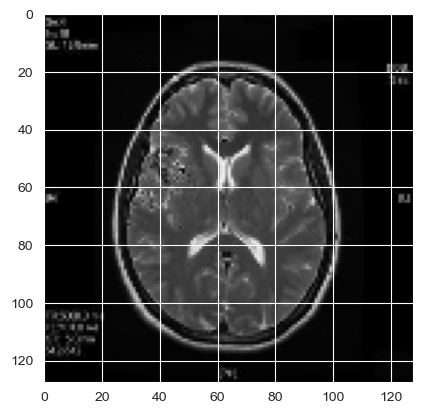

In [145]:
index=list(range(len(mri)))
np.random.shuffle(index)
sample=mri[index[0]]
img=sample['image']
plt.imshow(img)
plt.show()

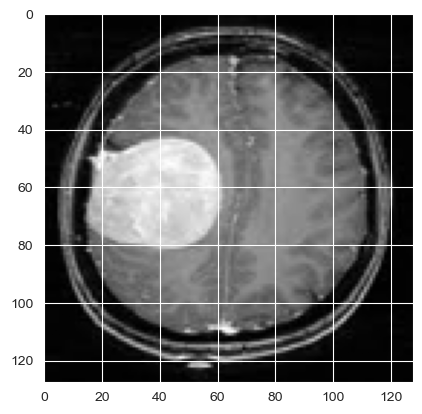

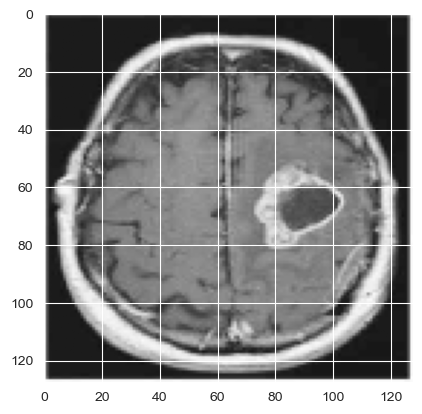

In [146]:
it=iter(mri)
for i in (range(2)):
    sample=next(it)
    img=sample['image']
    plt.imshow(img)
    plt.show()

# with dataloader

In [147]:
dataloader=DataLoader(mri,batch_size=1,shuffle=True)


batch_size is for get many images in one itration ( this is helpfull for get  train and test sets

In [148]:
 for sample in dataloader:
    img=sample['image'].squeeze()# we adde squeeze to delete extra dimension
    print(img.shape)

torch.Size([128, 128, 3])
torch.Size([128, 128, 3])
torch.Size([128, 128, 3])
torch.Size([128, 128, 3])
torch.Size([128, 128, 3])
torch.Size([128, 128, 3])
torch.Size([128, 128, 3])
torch.Size([128, 128, 3])
torch.Size([128, 128, 3])
torch.Size([128, 128, 3])
torch.Size([128, 128, 3])
torch.Size([128, 128, 3])
torch.Size([128, 128, 3])
torch.Size([128, 128, 3])
torch.Size([128, 128, 3])
torch.Size([128, 128, 3])
torch.Size([128, 128, 3])
torch.Size([128, 128, 3])
torch.Size([128, 128, 3])
torch.Size([128, 128, 3])
torch.Size([128, 128, 3])
torch.Size([128, 128, 3])
torch.Size([128, 128, 3])
torch.Size([128, 128, 3])
torch.Size([128, 128, 3])
torch.Size([128, 128, 3])
torch.Size([128, 128, 3])
torch.Size([128, 128, 3])
torch.Size([128, 128, 3])
torch.Size([128, 128, 3])
torch.Size([128, 128, 3])
torch.Size([128, 128, 3])
torch.Size([128, 128, 3])
torch.Size([128, 128, 3])
torch.Size([128, 128, 3])
torch.Size([128, 128, 3])
torch.Size([128, 128, 3])
torch.Size([128, 128, 3])
torch.Size([

# Create CNN using PyTorch

In [149]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.cnn_model=nn.Sequential(
            nn.Conv2d(in_channels=3,out_channels=6,kernel_size=5),
            nn.Tanh(),
            nn.AvgPool2d(kernel_size=2,stride=5),
            nn.Conv2d(in_channels=6,out_channels=16,kernel_size=5),
            nn.Tanh(),
            nn.AvgPool2d(kernel_size=2,stride=5)
        )
        self.fc_model=nn.Sequential(
            nn.Linear(in_features=256,out_features=120),
            nn.Tanh(),
            nn.Linear(in_features=120,out_features=84),
            nn.Tanh(),
            nn.Linear(in_features=84,out_features=1)
        )
        
    def forward(self, x):
        x=self.cnn_model(x)
        x=x.view(x.size(0),-1) # flattening 2D arrays
        x=self.fc_model(x)
        x=F.sigmoid(x)
        return x

![Tanh image](./images/tanh%20function.png)£
![Sigmoid Image](./images/sigmoid%20function.png)

## The Logic behind the numbers
![Grand Formula Image](./images/grand%20formula.png)

Look into the parameters of the model
![Models Image](./images/cnn%20fc%20schema.png)

In [150]:
model=CNN()

In [151]:
model

CNN(
  (cnn_model): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): Tanh()
    (2): AvgPool2d(kernel_size=2, stride=5, padding=0)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): Tanh()
    (5): AvgPool2d(kernel_size=2, stride=5, padding=0)
  )
  (fc_model): Sequential(
    (0): Linear(in_features=256, out_features=120, bias=True)
    (1): Tanh()
    (2): Linear(in_features=120, out_features=84, bias=True)
    (3): Tanh()
    (4): Linear(in_features=84, out_features=1, bias=True)
  )
)

In [152]:
model.cnn_model

Sequential(
  (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (1): Tanh()
  (2): AvgPool2d(kernel_size=2, stride=5, padding=0)
  (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (4): Tanh()
  (5): AvgPool2d(kernel_size=2, stride=5, padding=0)
)

In [153]:
model.cnn_model[0]

Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))

In [154]:
model.cnn_model[0].weight.shape

torch.Size([6, 3, 5, 5])

6 filtres,3 channels,(5,5) kernel_size

In [155]:
model.cnn_model[0].weight[0]

tensor([[[ 0.0298, -0.0455, -0.0807,  0.0591,  0.0261],
         [ 0.0259,  0.0983,  0.0634, -0.1147, -0.0013],
         [-0.0250, -0.0517, -0.0710,  0.0137,  0.1005],
         [ 0.0996, -0.1109, -0.0282,  0.0937,  0.0972],
         [-0.0724, -0.0154,  0.0496,  0.0810, -0.1146]],

        [[ 0.0467,  0.0119,  0.0257, -0.0126, -0.0320],
         [-0.0489, -0.0448,  0.0700, -0.0806, -0.0010],
         [ 0.0944, -0.0321,  0.0688, -0.0941, -0.0483],
         [ 0.0200, -0.0835, -0.0775,  0.0979, -0.0808],
         [-0.1028,  0.0708,  0.0576,  0.1110, -0.0845]],

        [[-0.0959, -0.0819,  0.0282,  0.0499,  0.1072],
         [ 0.1059,  0.0367, -0.0793, -0.1135, -0.1023],
         [-0.0711,  0.0642, -0.1047,  0.0982, -0.0437],
         [ 0.0972,  0.0009, -0.0622, -0.0514,  0.0681],
         [ 0.0903, -0.0765, -0.0953, -0.0926,  0.0378]]],
       grad_fn=<SelectBackward0>)

In [156]:
model.fc_model[0].weight.shape

torch.Size([120, 256])

## Understand x.view model

In [157]:
x=torch.tensor([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
x=x.reshape((2,2,2,2))

In [158]:
x

tensor([[[[ 1,  2],
          [ 3,  4]],

         [[ 5,  6],
          [ 7,  8]]],


        [[[ 9, 10],
          [11, 12]],

         [[13, 14],
          [15, 16]]]])

In [159]:
x.view(-1)

tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [160]:
x.view(x.size(0),-1)

tensor([[ 1,  2,  3,  4,  5,  6,  7,  8],
        [ 9, 10, 11, 12, 13, 14, 15, 16]])

# Evaluate NEw Born Model

In [161]:
mri=MRI()
mri.normalize()

device is for where we should run our code (GPU or CPU)

In [162]:
# Check if CUDA is available
cuda_available = torch.cuda.is_available()
print(f"CUDA Available: {cuda_available}")
# Print the name of the GPU
if cuda_available:
    print(f"GPU: {torch.cuda.get_device_name(0)}")
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")

CUDA Available: False


link the model with the device 

In [163]:
model=CNN().to(device)

define the dataloader

In [164]:
batch_size=32
dataloader=DataLoader(mri,batch_size=batch_size,shuffle=False)

In [165]:
model.eval()
outputs=[]
y_true=[]

with torch.no_grad():
    for d in dataloader:
        image=d['image'].to(device)
        label=d['label'].to(device)
        image = image.reshape(image.shape[0],image.shape[3], image.shape[1], image.shape[2])  # Convert from [batch_size, height, width, 3] to [batch_size, 3, height, width]
        y_hat=model(image)
        outputs.append(y_hat.cpu().detach().numpy())
        y_true.append(label.cpu().detach().numpy())

In [166]:
outputs=np.concatenate(outputs,axis=0).squeeze()
y_true=np.concatenate(y_true,axis=0).squeeze()

In [167]:
def threshold(scores,threshold=0.5,minimum=0,maximum=1.0):
    x=np.array(list(scores))
    x[x>=threshold]=maximum
    x[x<threshold]=minimum
    return x

In [168]:
threshold(outputs)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

![Accuracy Image](./images/accuracy_score.png)

In [169]:
accuracy_score(y_true,threshold(outputs))

0.6285714285714286

[Text(0, 0.5, 'Tumor'), Text(0, 1.5, 'Healthy')]

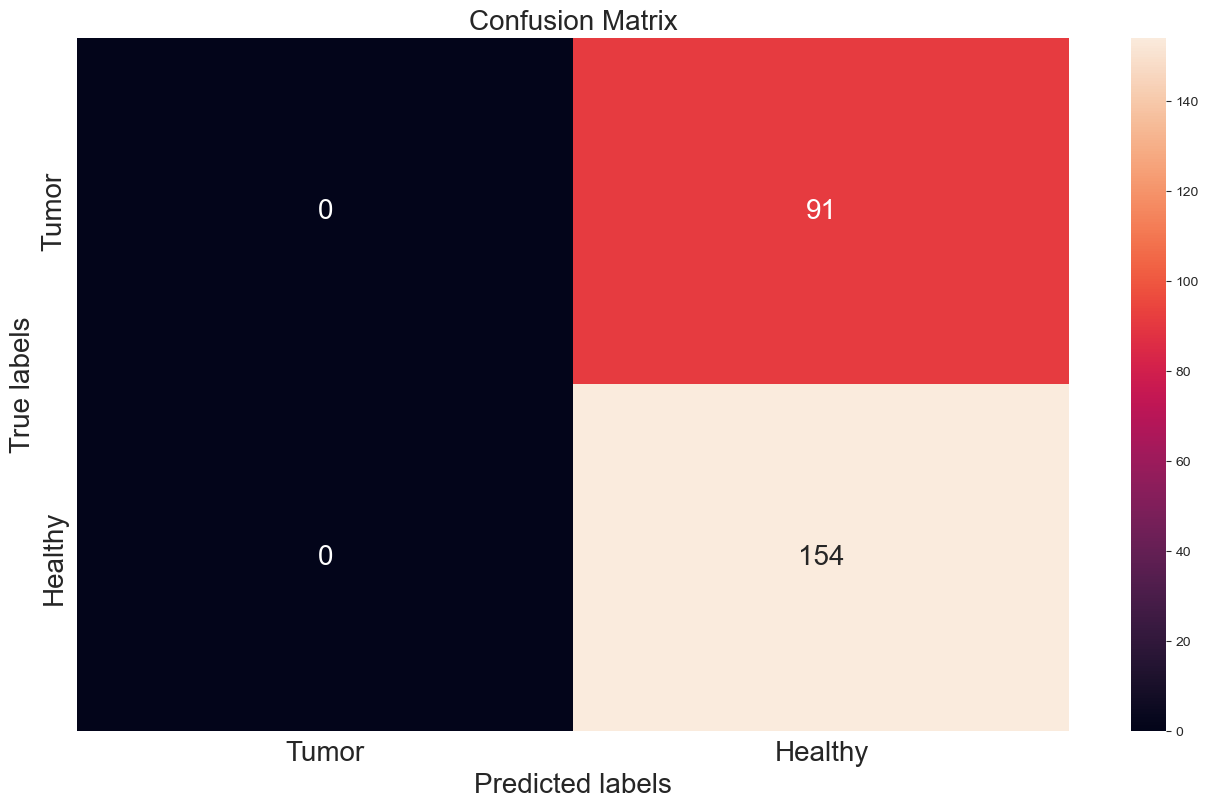

In [170]:

plt.figure(figsize=(16,9))
cm = confusion_matrix(y_true, threshold(outputs))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, annot_kws={"size": 20})

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=20)
ax.set_ylabel('True labels', fontsize=20)
ax.set_title('Confusion Matrix', fontsize=20)
ax.xaxis.set_ticklabels(['Tumor','Healthy'], fontsize=20)
ax.yaxis.set_ticklabels(['Tumor','Healthy'], fontsize=20)

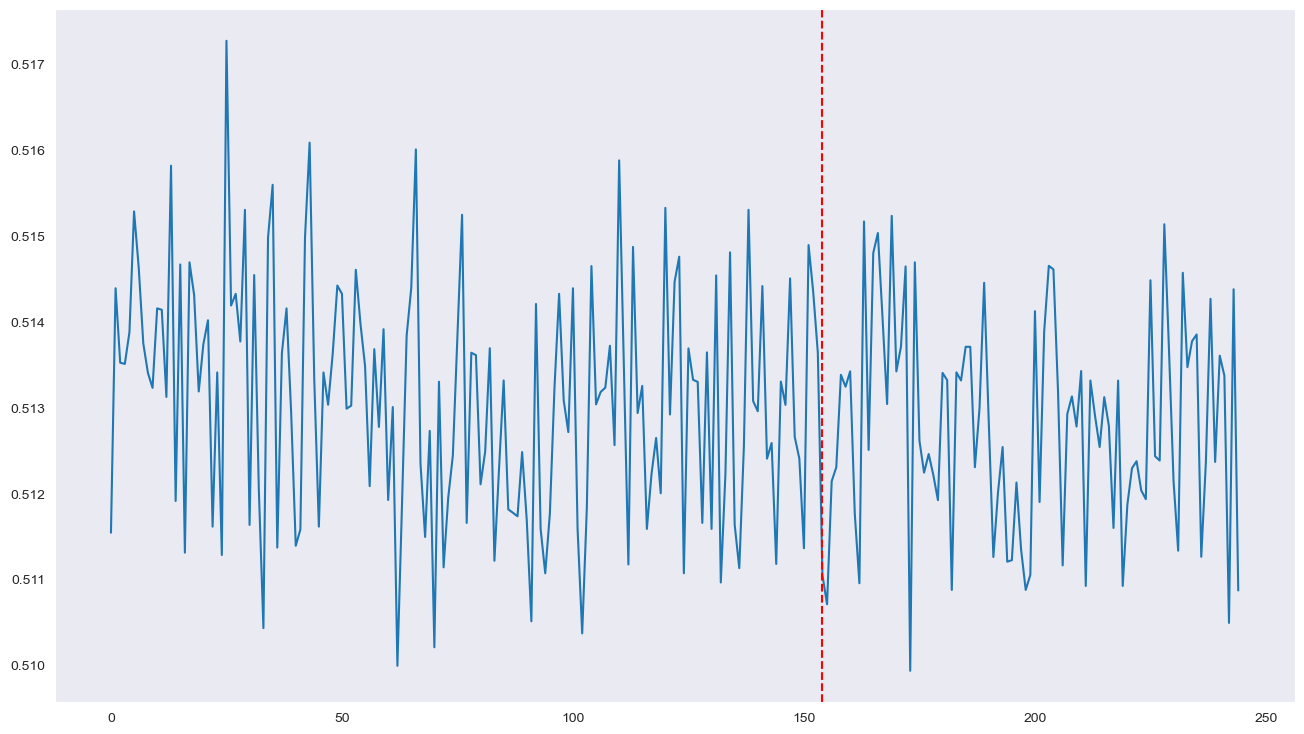

In [171]:
plt.figure(figsize=(16,9))
plt.plot(outputs)
plt.axvline(x=len(tumor), color='r', linestyle='--')
plt.grid()

# Train the model

In [172]:
eta=0.0001
EPOCH=400
optimiser=torch.optim.Adam(model.parameters(),lr=eta)
dataloader=DataLoader(mri,batch_size=32,shuffle=True)
model.train()

CNN(
  (cnn_model): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): Tanh()
    (2): AvgPool2d(kernel_size=2, stride=5, padding=0)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): Tanh()
    (5): AvgPool2d(kernel_size=2, stride=5, padding=0)
  )
  (fc_model): Sequential(
    (0): Linear(in_features=256, out_features=120, bias=True)
    (1): Tanh()
    (2): Linear(in_features=120, out_features=84, bias=True)
    (3): Tanh()
    (4): Linear(in_features=84, out_features=1, bias=True)
  )
)

In [173]:
for epoch in range(1,EPOCH):
    losses=[]
    for D in dataloader:
        optimiser.zero_grad()
        data=D['image'].to(device)
        label=D['label'].to(device)
        data = data.reshape(data.shape[0],data.shape[3], data.shape[1], image.shape[2])  # Convert from [batch_size, height, width, 3] to [batch_size, 3, height, width]
        y_hat=model(data)
        #define error function
        error=nn.BCELoss()
        loss=torch.sum(error(y_hat.squeeze(),label))
        loss.backward()
        optimiser.step()
        losses.append(loss.item())
    if (epoch+1) % 10 == 0:
        print('Train Epoch: {}\tLoss: {:.6f}'.format(epoch+1, np.mean(losses)))

Train Epoch: 10	Loss: 0.615696
Train Epoch: 20	Loss: 0.586128
Train Epoch: 30	Loss: 0.550914
Train Epoch: 40	Loss: 0.542540
Train Epoch: 50	Loss: 0.514138
Train Epoch: 60	Loss: 0.489526
Train Epoch: 70	Loss: 0.457918
Train Epoch: 80	Loss: 0.437826
Train Epoch: 90	Loss: 0.415773
Train Epoch: 100	Loss: 0.407771
Train Epoch: 110	Loss: 0.390261
Train Epoch: 120	Loss: 0.379035
Train Epoch: 130	Loss: 0.362852
Train Epoch: 140	Loss: 0.349358
Train Epoch: 150	Loss: 0.327201
Train Epoch: 160	Loss: 0.314643
Train Epoch: 170	Loss: 0.295249
Train Epoch: 180	Loss: 0.266524
Train Epoch: 190	Loss: 0.256704
Train Epoch: 200	Loss: 0.238392
Train Epoch: 210	Loss: 0.215880
Train Epoch: 220	Loss: 0.204321
Train Epoch: 230	Loss: 0.180873
Train Epoch: 240	Loss: 0.166502
Train Epoch: 250	Loss: 0.156384
Train Epoch: 260	Loss: 0.123889
Train Epoch: 270	Loss: 0.109568
Train Epoch: 280	Loss: 0.092085
Train Epoch: 290	Loss: 0.077095
Train Epoch: 300	Loss: 0.071094
Train Epoch: 310	Loss: 0.055008
Train Epoch: 320	

# evaluate trained model

In [174]:
model.eval()
outputs=[]
y_true=[]

with torch.no_grad():
    for d in dataloader:
        image=d['image'].to(device)
        label=d['label'].to(device)
        image = image.reshape(image.shape[0],image.shape[3], image.shape[1], image.shape[2])  # Convert from [batch_size, height, width, 3] to [batch_size, 3, height, width]
        y_hat=model(image)
        outputs.append(y_hat.cpu().detach().numpy())
        y_true.append(label.cpu().detach().numpy())

In [175]:
outputs=np.concatenate(outputs,axis=0).squeeze()
y_true=np.concatenate(y_true,axis=0).squeeze()

In [176]:
accuracy_score(y_true,threshold(outputs))

1.0

[Text(0, 0.5, 'Tumor'), Text(0, 1.5, 'Healthy')]

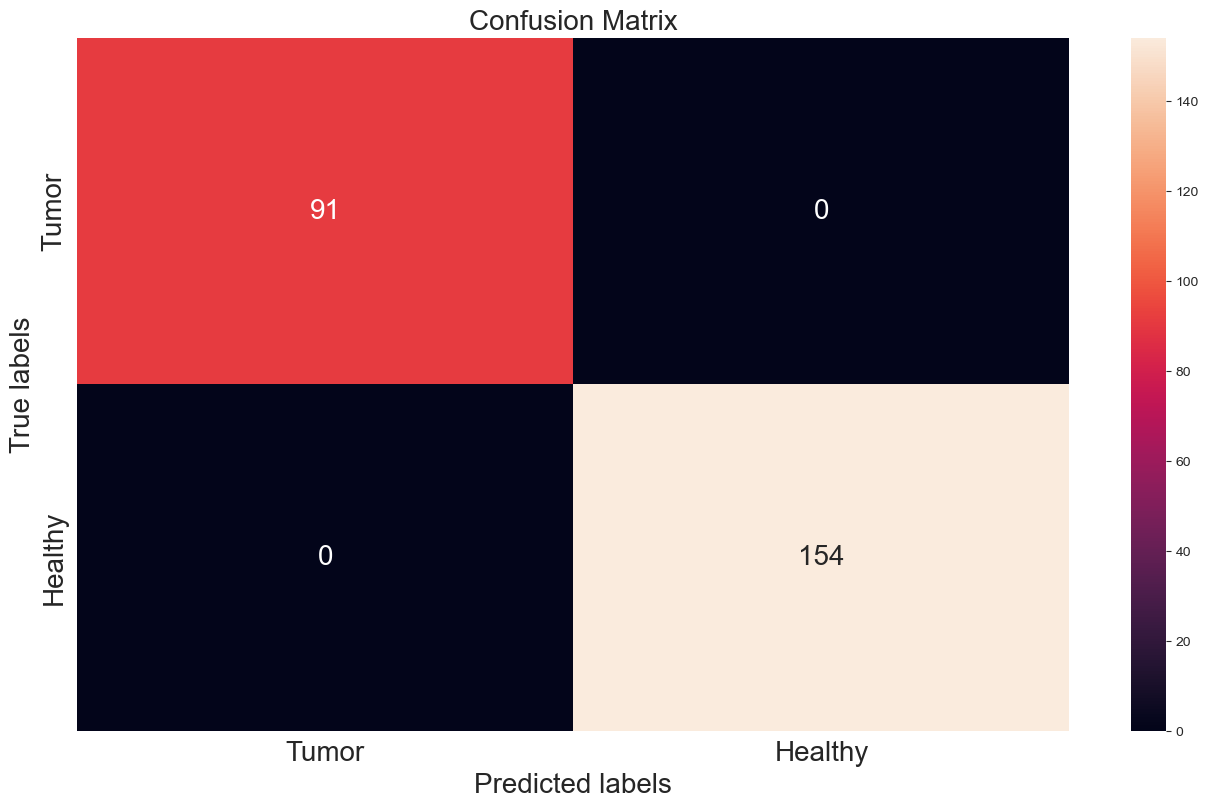

In [183]:
plt.figure(figsize=(16,9))
cm = confusion_matrix(y_true, threshold(outputs))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, annot_kws={"size": 20})

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=20)
ax.set_ylabel('True labels', fontsize=20)
ax.set_title('Confusion Matrix', fontsize=20)
ax.xaxis.set_ticklabels(['Tumor','Healthy'], fontsize=20)
ax.yaxis.set_ticklabels(['Tumor','Healthy'], fontsize=20)

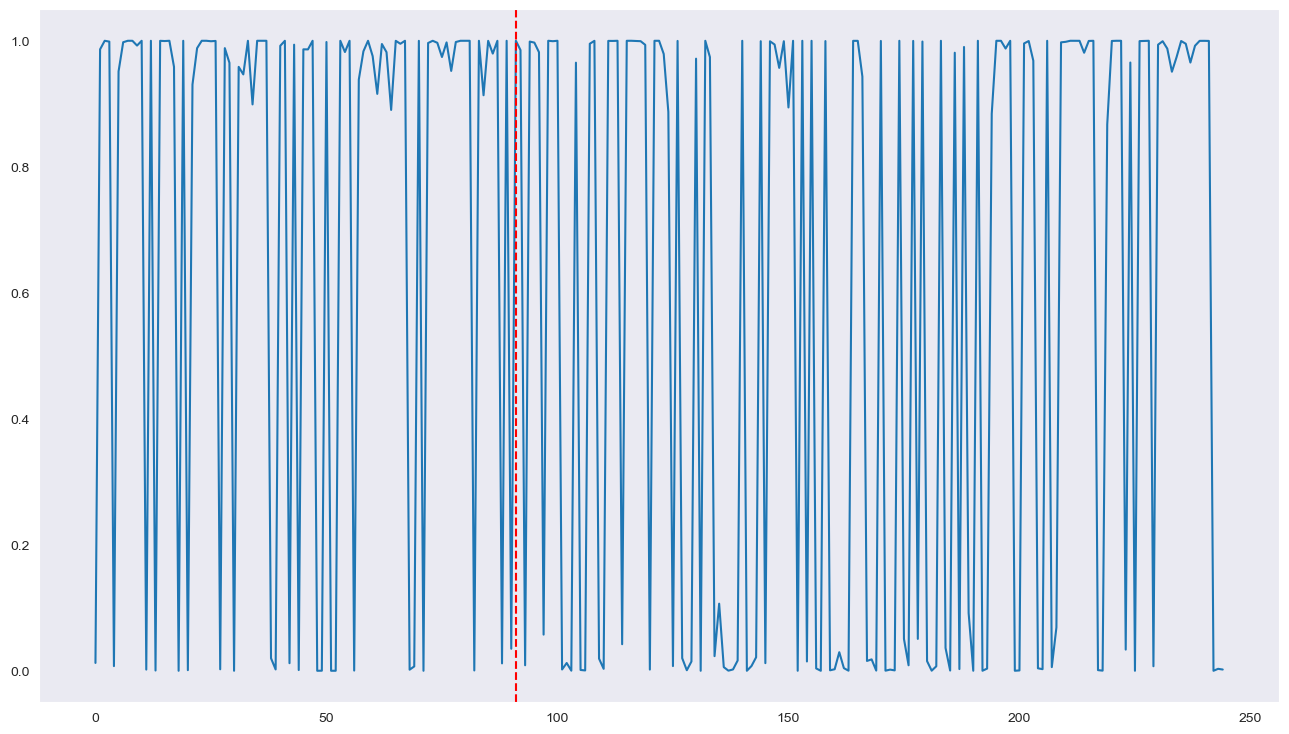

In [184]:
plt.figure(figsize=(16,9))
plt.plot(outputs)
plt.axvline(x=len(healthy), color='r', linestyle='--')
plt.grid()

Visualize the feature map of model

In [185]:
no_layers=0
conv_layers=[]

In [187]:
model_children=list(model.children())

In [188]:
for child in model_children:
    if type(child)==nn.Sequential:
        for layer in child.children():
            if type(layer)==nn.Conv2d:
                no_layers+=1
                conv_layers.append(layer)

In [190]:
conv_layers[0]

Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))

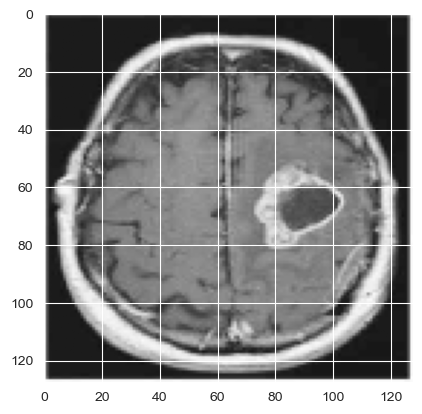

In [210]:
img=mri[100]['image']
plt.imshow(img)

In [211]:
img=torch.from_numpy(img).to(device)

In [213]:

img=img.unsqueeze(0)
img = img.reshape(img.shape[0],img.shape[3], img.shape[1], img.shape[2])  # Convert from [batch_size, height, width, 3] to [batch_size, 3, height, width]
img.shape


torch.Size([1, 3, 128, 128])

In [214]:
img.shape

torch.Size([1, 3, 128, 128])

In [216]:
results=[conv_layers[0](img)]
for i in range(1,len(conv_layers)):
    results.append(conv_layers[i](results[-1]))
outputs=results

In [217]:
len(outputs)

2

In [218]:
outputs[0].shape

torch.Size([1, 6, 124, 124])

Layer  1


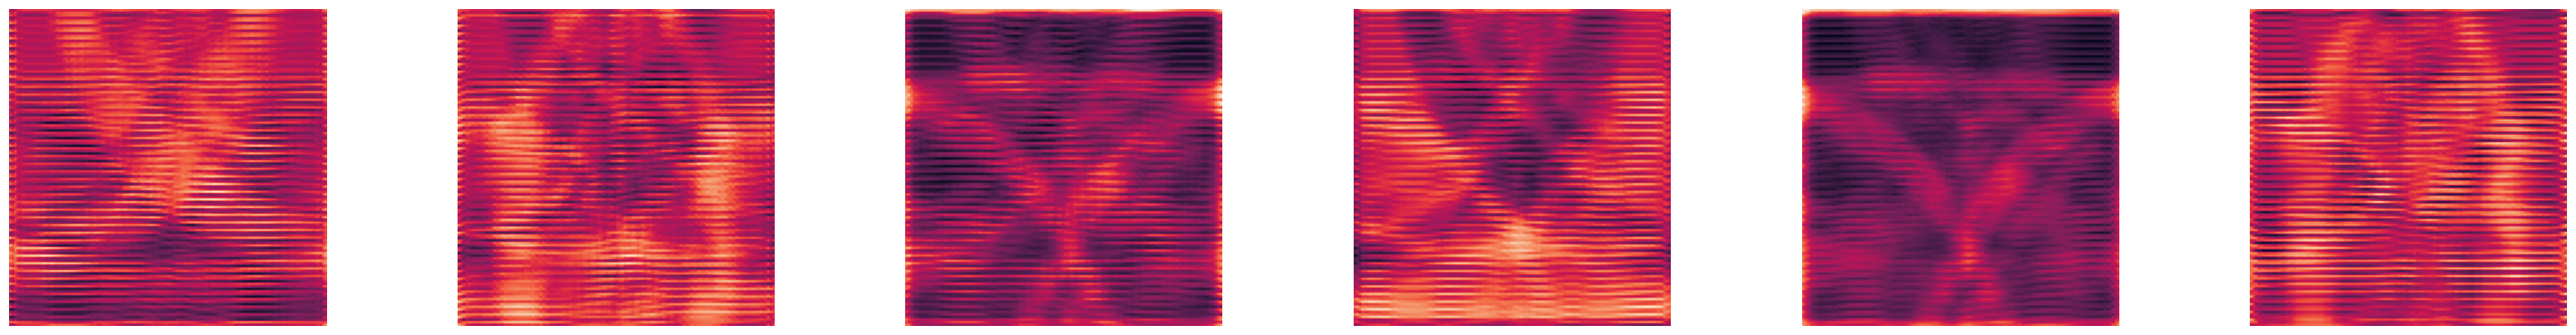

Layer  2


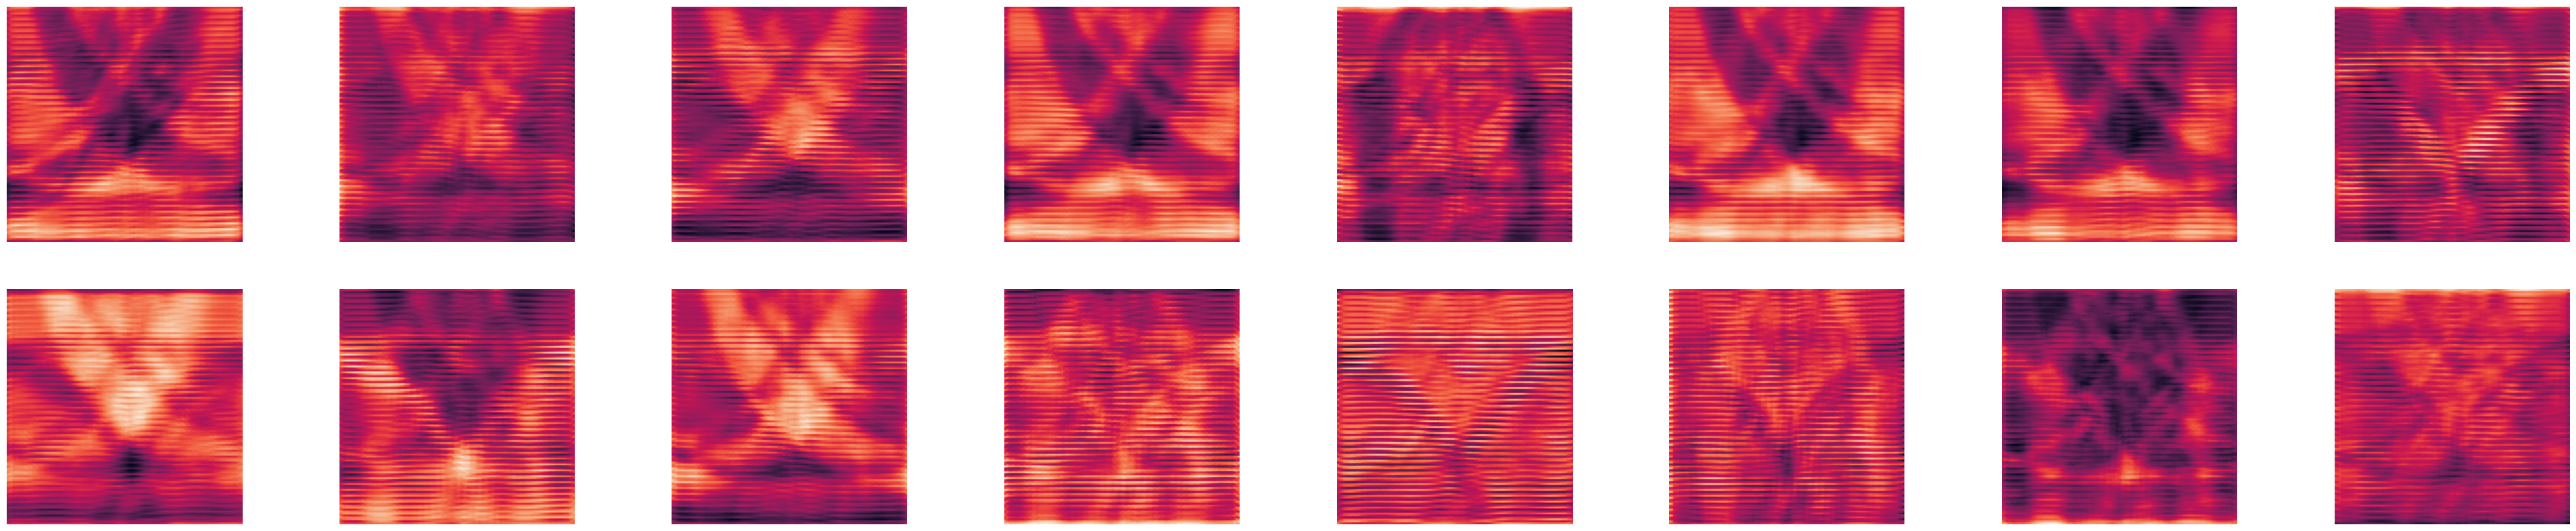

In [219]:
for num_layer in range(len(outputs)):
    plt.figure(figsize=(50, 10))
    layer_viz = outputs[num_layer].squeeze()
    print("Layer ",num_layer+1)
    for i, f in enumerate(layer_viz):
        plt.subplot(2, 8, i + 1)
        plt.imshow(f.detach().cpu().numpy())
        plt.axis("off")
    plt.show()
    plt.close()